# Probability & Statistics Cheat-Sheet

This notebook collects:
- Core formulas (PMF, empirical CDF, grouped PDF/CDF)
- Worked examples that match your exercises
- A graph showing how to read **counts** directly from the **empirical CDF**

---

## 1.1) Probability Mass Function (PMF) – for discrete data

$$
f(x) = P(X = x) = \frac{\#\{x_i = x\}}{n}
$$

- Count how many sample values equal $x$.
- Divide by total sample size $n$.

**Example**
$x=[0,-3,3,-3,-3,-3,-2,1,-3,0,1,-3,2,3,-2,2,3,0,-3]$

**Goal.** $f(3)=P(X=3)=\dfrac{\#\{x_i=3\}}{n}$

- Count 3’s: there are **3** of them.
- Sample size $n=19$.

**Result.**
$\displaystyle f(3)=\frac{3}{19}$

## 1.2) Empirical Cumulative Distribution Function (CDF) – for discrete data

$$
F(x) = P(X \leq x) = \frac{\#\{x_i \leq x\}}{n}
$$

- Count how many sample values are less than or equal to $x$.
- Divide by $n$.
- Always non-decreasing, $F(x) \to 1$ at the maximum sample value.

**Example**
$x=[-3,2,0,-2,-1,6,-2,-1,4,2,0,0,6,3,-3,0,2,3]$

**Goal.** $F(8)=P(X\le 8)=\dfrac{\#\{x_i\le 8\}}{n}$

- The maximum value is $6\le 8$, so **all** values are $\le 8$.
- $n=18$.

**Result.**
$\displaystyle F(8)=\frac{18}{18}=1$


## 1.3) PDF (Histogram Density) – for grouped data

If data is grouped into classes:

$$
f(x) = \frac{\text{relative frequency of class}}{\text{class width}}
$$

Where:

- Relative frequency = $\dfrac{\text{class frequency}}{n}$.
- Class width = $U - L$, where $L$ = lower bound, $U$ = upper bound.
- This gives **density**, not direct probability.

**Example**

We have grouped data with the following classes and frequencies:

| Class $[L,U)$ | Freq. $h$ | Width $w=U-L$ | Rel. freq. $h/n$ |
|---|---:|---:|---:|
| $[13,45)$  | 13 | 32  | $13/55$ |
| $[45,102)$ | 12 | 57  | $12/55$ |
| $[102,176)$| 5  | 74  | $5/55$  |
| $[176,360)$| 17 | 184 | $17/55$ |
| $[360,782)$| 8  | 422 | $8/55$  |

Total $n=55$. Since $14\in[13,45)$:

- $w=32$, $h=13$

**Formula (histogram density).**
$\displaystyle f(x)=\frac{\text{relative freq.}}{\text{class width}}=\frac{h/n}{w}$

**Calculation.**
$\displaystyle f(14)=\frac{13/55}{32}=\frac{13}{1760}\approx 0.00739$

**Result.**
$\boxed{\;\dfrac{13}{1760}\;}$

## 1.4) CDF – for grouped data (linear interpolation inside class)

If \(x \in [L, U)\) is in a class with frequency \(h\), width \(w = U-L\), and cumulative frequency before the class = \(c\):

$$
F(x) = \frac{c}{n} + \frac{h}{n} \cdot \frac{x - L}{w}
$$

- First part = probability of all earlier classes.
- Second part = fraction of current class covered up to \(x\).

**Example**

We have grouped data with the following relative frequencies:

| Class $[L,U)$ | Rel. freq. |
|---|---:|
| $[6,21)$   | $\dfrac{13}{67}$ |
| $[21,32)$  | $\dfrac{13}{67}$ |
| $[32,80)$  | $\dfrac{7}{67}$  |
| $[80,172)$ | $\dfrac{28}{67}$ |
| $[172,202)$| $\dfrac{12}{67}$ |

$93\in[80,172)$, with $L=80,\ U=172,\ w=92$.
Cumulative relative frequency **before** this class:
$\dfrac{13}{67}+\dfrac{13}{67}+\dfrac{7}{67}=\dfrac{27}{67}$.

**Linear interpolation inside the class.**
Fraction of the class covered up to $x$: $\dfrac{x-L}{w}=\dfrac{93-80}{92}=\dfrac{13}{92}$.

**Formula.**
$\displaystyle F(x)=\text{cum\_before}+\text{rel\_freq(class)}\cdot\frac{x-L}{w}$

**Calculation.**
$\displaystyle F(93)=\frac{27}{67}+\frac{28}{67}\cdot\frac{13}{92}
=\frac{712}{1541}\approx 0.462$

**Result.**
$\boxed{\;\dfrac{712}{1541}\;}$

## 1.5) Counts from an Empirical CDF

### Generic formulas

For a sample of size $n$ with empirical CDF $F(t)$:

- **At most (höchstens) $t$:**
$$
\# = n \cdot F(t)
$$

- **More than (mehr als) $t$:**
$$
\# = n \cdot (1 - F(t))
$$

---

### Example (20 students)

We have $n=20$ students. The empirical CDF is shown below.

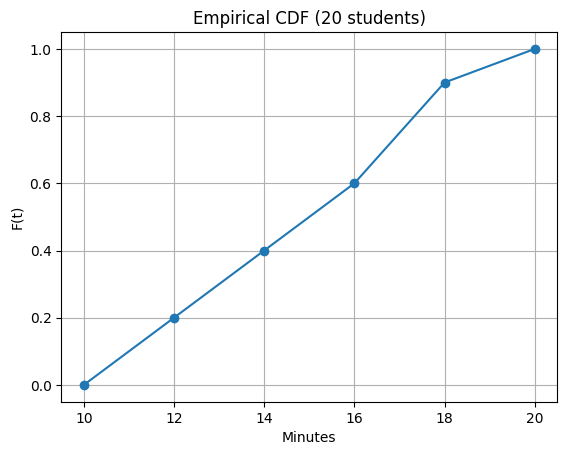

At most (höchstens) 15 min: 10 students
More than (mehr als) 19 min: 1 student


In [9]:
import matplotlib.pyplot as plt

# Example CDF values for 20 students
x_points = [10, 12, 14, 16, 18, 20]
F_points = [0.0, 0.2, 0.4, 0.6, 0.9, 1.0]

plt.figure()
plt.plot(x_points, F_points, marker="o")
plt.title("Empirical CDF (20 students)")
plt.xlabel("Minutes")
plt.ylabel("F(t)")
plt.grid(True)
plt.show()

# From the graph:
n = 20
F15 = 0.50
F19 = 0.95
print("At most (höchstens) 15 min:", int(n*F15), "students")
print("More than (mehr als) 19 min:", int(n*(1-F19)), "student")


## 1.6) Counts from a Step CDF

### Generic formulas

For a sample of size $n$ with stepwise CDF $F(t)$:

- **At most (Höchstens) $t$:**
$$
\# = n \cdot F(t)
$$

- **Exactly (Genau) $t$:**
$$
\# = n \cdot \big(F(t) - F(t^-)\big)
$$
where $F(t^-)$ is the CDF value just before $t$.

---

### Example (10 devices)

We have $n=10$ devices. The step CDF is shown below.


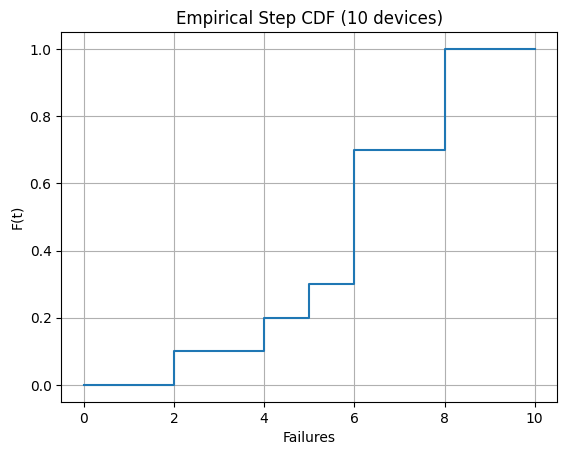

At most (höchstens) 6 failures: 7
Exactly (genau) 6 failures: 4


In [10]:
import matplotlib.pyplot as plt

# Stepwise CDF values for 10 devices
x_points = [0, 2, 4, 5, 6, 8, 10]
F_points = [0.0, 0.1, 0.2, 0.3, 0.7, 1.0, 1.0]

plt.figure()
plt.step(x_points, F_points, where="post")
plt.title("Empirical Step CDF (10 devices)")
plt.xlabel("Failures")
plt.ylabel("F(t)")
plt.grid(True)
plt.show()

# From the graph:
n = 10
F5 = 0.3
F6 = 0.7
print("At most (höchstens) 6 failures:", round(n*F6))
print("Exactly (genau) 6 failures:", round(n*(F6-F5)))
